# __Evaluación de modelos de clasificación de texto__

_Victor Hugo Martínez González_

_Temas Selectos de Inteligencia Artificial_

La evaluación de modelos de clasificación de texto es fundamental para medir su rendimiento. A continuación, se describen y ejemplifican tres métodos comunes de evaluación: F-Measure, Matriz de Confusión y Cross-Validation.

## 1. __Matriz de Confusión__

La matriz de confusión es una tabla que describe el rendimiento de un modelo de clasificación mostrando las predicciones correctas e incorrectas en cada clase. Contiene las siguientes métricas:

  - __TP (True Positives)__: Casos correctamente clasificados como positivos.
  - __TN (True Negatives)__: Casos correctamente clasificados como negativos.
  - __FP (False Positives)__: Casos incorrectamente clasificados como positivos (falsos positivos).
  - __FN (False Negatives)__: Casos incorrectamente clasificados como negativos (falsos negativos).

__Ejemplo de una matriz__ de confusión para clasificación binaria (Spam/No Spam):
	
||Predicción: Spam	|Predicción: No Spam|
|-|-|-|
|Real: Spam	|TP = 70	|FN = 10|
|Real: No Spam	|FP = 30	|TN = 90|

A partir de esta matriz se pueden calcular otras métricas como la __Exactitud (Accuracy)__:
$$
Exactitud=\frac{TP+TN}{TP+TN+FP+FN}=\frac{70+90}{70+90+30+10}=0.80
$$

## 2. __F-Measure (F1 Score)__

La F-Measure o F1-Score es una métrica de evaluación que combina la Precisión y el Recall en un solo valor, especialmente útil cuando los datos están desbalanceados.

  - Precisión (Precision): Proporción de verdaderos positivos (TP) sobre todos los ejemplos clasificados como positivos.
    $$
    Precisión=\frac{TP}{TP+FP}
    $$


  - Recall (Sensibilidad): Proporción de verdaderos positivos (TP) sobre todos los ejemplos que realmente son positivos.
    $$
    Recall=\frac{TP}{TP+FN}
    $$

  - F1 Score: Es la media armónica entre la Precisión y el Recall.
    $$
    F1 Score=2×\frac{Precisión×Recall}{Precisión+Recall}
    $$

__Ejemplo de cálculo__ para clasificar corres de spam con no spam

  __Verdaderos Positivos (TP)__: 70 (Correos spam correctamente clasificados)

  __Falsos Positivos (FP)__: 30 (Correos no spam clasificados como spam)
  
  __Falsos Negativos (FN)__: 10 (Correos spam clasificados como no spam)

  - Precisión:
  $$
  \frac{70}{70+30}=0.70
  $$

  - Recall:
  $$
    \frac{70}{70+10}=0.875
  $$

  - F1 Score:
  $$
    2×\frac{0.70×0.875}{0.70+0.875}=0.78
  $$

## 3. __Cross-Validation__

__La validación cruzada (cross-validation)__ es una técnica que evalúa el rendimiento de un modelo dividiendo los datos en subconjuntos. El modelo se entrena en algunos subconjuntos y se valida en otros. El método más común es __k-Fold Cross-Validation__.

  - __k-Fold Cross-Validation__: Los datos se dividen en k partes (folds). El modelo se entrena en k-1 partes y se evalúa en la parte restante. Este proceso se repite k veces, variando el fold de validación, y se promedia el resultado.

__Ejemplo__ con 5-Fold Cross-Validation:

Se tienen 1000 correos. Se dividen en 5 partes (folds) de 200 correos cada uno. El proceso sería:

  1. Entrenar en 800 correos __(4 folds)__ y validar en 200 correos (1 fold).
  2. Repetir este proceso 5 veces, alternando el fold que se usa para validación.
  3. Calcular la métrica promedio __(F1 Score, Exactitud, etc.)__ en las 5 repeticiones.

Esto reduce el riesgo de overfitting y ofrece una mejor estimación del rendimiento real del modelo.


## Ejemplo en código real

El código de clasificación de texto tiene como objetivo entrenar un modelo de aprendizaje automático para clasificar textos en diferentes categorías y evaluar su rendimiento. En este caso, se usa el dataset "20 Newsgroups" que contiene noticias de diferentes temáticas, y se clasifica los textos en categorías como "deporte", "ciencia", "gráficos", etc.


## Importar librería

- En ```sklearn.model_selection``` se va usar ```KFold``` para realizar la validación cruzada
- En ```sklearn.metrics``` se va usar ```confusion_matrix``` y ```f1_score``` para obterter la matriz de confusión y la métrica f1

In [9]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Cargar el Dataset y Preprocesarlo

Utilizar el dataset de _"20 Newsgroups"_ y convetir los textos en vectores usando _TF-IDF (Term Frequency - Inverse Document Frequency)_.

In [2]:
# Cargar el dataset
newsgroups = fetch_20newsgroups(subset='train', categories=['rec.sport.hockey', 'sci.space', 'comp.graphics', 'sci.med'])

# Vectorizar los textos usando TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target


## Dividir los Datos y Entrenar el Modelo

Primero, dividimos los datos en conjunto de entrenamiento y prueba para probar el rendimiento con una evaluación simple

In [3]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Naive Bayes
model = MultinomialNB()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)


## Evaluación con Matriz de Confusión

Usar la matriz de confusión para analizar el rendimiento del modelo.

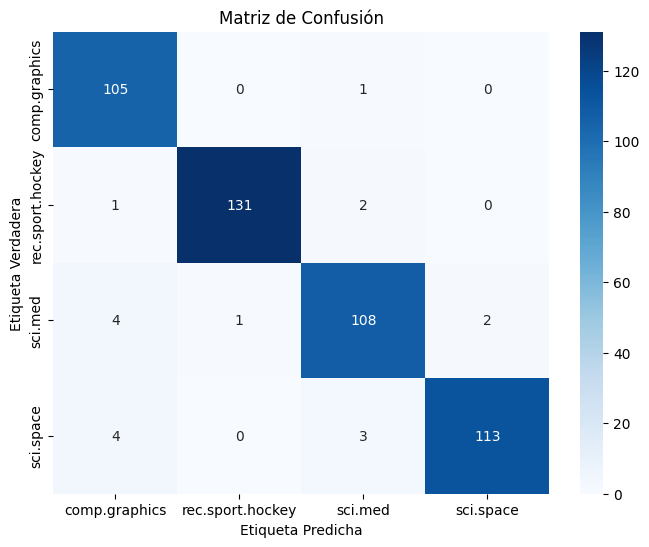

In [4]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()


## Calcular el F1-Score y el Informe de Clasificación

Calcular el F1-Score y mostrar un informe completo del rendimiento del modelo usando el ```classification_report```.

In [6]:
# Calcular F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar el F1-Score
print(f"F1-Score (Ponderado): {f1:.2f}")

# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


F1-Score (Ponderado): 0.96
                  precision    recall  f1-score   support

   comp.graphics       0.92      0.99      0.95       106
rec.sport.hockey       0.99      0.98      0.98       134
         sci.med       0.95      0.94      0.94       115
       sci.space       0.98      0.94      0.96       120

        accuracy                           0.96       475
       macro avg       0.96      0.96      0.96       475
    weighted avg       0.96      0.96      0.96       475



## Validación Cruzada (Cross-Validation)

Utilizar 5-Fold Cross-Validation para obtener una estimación más robusta del rendimiento del modelo.

In [7]:
# Usar validación cruzada con 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='f1_weighted')

# Mostrar los resultados de Cross-Validation
print(f"Cross-Validation F1-Score (Ponderado): {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")


Cross-Validation F1-Score (Ponderado): 0.95 ± 0.01


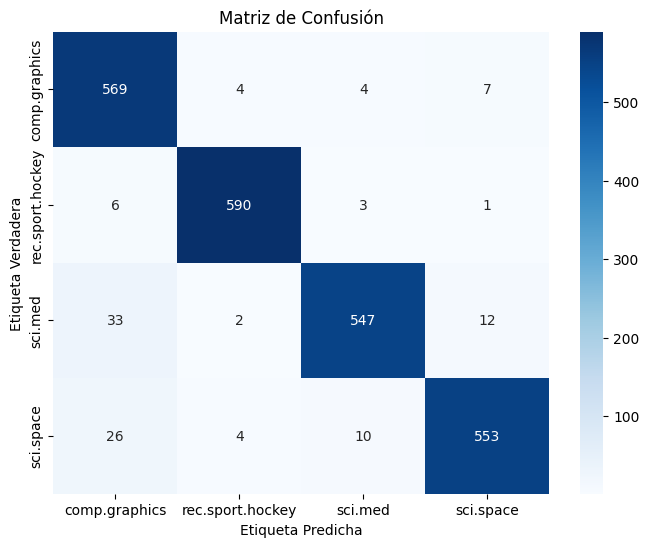

In [10]:
# Usar cross_val_predict para obtener las predicciones
y_pred = cross_val_predict(model, X, y, cv=kf, method='predict')

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()

In [11]:
# Calcular F1-Score
f1 = f1_score(y, y_pred, average='weighted')

# Mostrar el F1-Score
print(f"F1-Score (Ponderado): {f1:.2f}")

# Mostrar el informe de clasificación
print(classification_report(y, y_pred, target_names=newsgroups.target_names))

F1-Score (Ponderado): 0.95
                  precision    recall  f1-score   support

   comp.graphics       0.90      0.97      0.93       584
rec.sport.hockey       0.98      0.98      0.98       600
         sci.med       0.97      0.92      0.94       594
       sci.space       0.97      0.93      0.95       593

        accuracy                           0.95      2371
       macro avg       0.95      0.95      0.95      2371
    weighted avg       0.95      0.95      0.95      2371



### Conclusión 

Es evidente que al realizar la prueba sin la validación cruzada, el ```F1-Score``` es de 0.96, mientras que con ```Cross-Validation``` es de 0.95. Aunque parece haber una disminución en el puntaje, esta observación puede ser contraintuitiva, ya que se podría suponer que ```Cross-Validation``` debería proporcionar un mejor puntaje. Sin embargo, lo que realmente estamos obteniendo es una estimación más robusta del rendimiento del modelo, ya que la validación cruzada reduce la posibilidad de sobreajuste y ofrece una evaluación más generalizable. 